## BREAST CANCER DETECTION
Ahmet Deniz Güner 21627279

In [52]:
#required libraries imported
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Load the data

In [53]:
url = "data.csv"
df = pd.read_csv(url)

### Understanding Data
View general statistical information of data

In [54]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


I examined the size of the data and a small part of the data in the two cells below

In [55]:
df.shape

(569, 33)

In [56]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Using the info function, I examined the types of data in the columns in the data frame and noticed the nan values

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Data Cleaning
I deleted the columsn which have na value and then checked again

In [58]:
df = df.dropna(axis=1)
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In the following three cells, I determined the number of malignant and bening numbers respectively, then I visualized this data using pie chart and finally I converted the data into numerical data to be able to use it in the next stages.

In [59]:
counts = df['diagnosis'].value_counts()
print(counts)

B    357
M    212
Name: diagnosis, dtype: int64


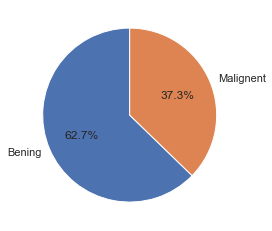

In [60]:
labels = 'Bening', 'Malignent'
sizes = [counts[0],counts[1]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

In [61]:
DiagnosisDict = {'M':1, 'B':0}
df.diagnosis = [DiagnosisDict[item] for item in df.diagnosis]
print(df.diagnosis.value_counts())

0    357
1    212
Name: diagnosis, dtype: int64


### Normalazation
I normalized data with using min-max normalazation to create moder more succesfull

In [62]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.001007,1.0,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.001007,1.0,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.001008,1.0,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.001008,1.0,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


### Clustering
I use Kmeans method for clustering 
I firstly clustered not normalized data and vizualized the result then i did the same operation on normalized data
I have observed that the clustering operation works more successfully on normalized data

Text(0.5, 1.0, 'NotNormalized KMeans clustering plot')

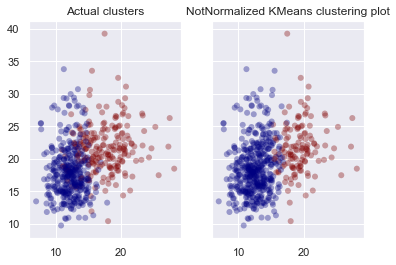

In [63]:
dfData = df.drop("id",axis=1)
X = dfData.drop('diagnosis', axis=1).values
km = KMeans(n_clusters=2, init="k-means++", n_init=10)
km_pred = km.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=df["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("NotNormalized KMeans clustering plot")

In [64]:
accurcy_notNormalized = df.diagnosis == km_pred
count = 0
for item in accurcy_notNormalized:
    if item == True:
        count = count + 1
print("Accurucy of clustering of not normalized data % " + str(100*count/569))        

Accurucy of clustering of not normalized data % 85.41300527240773


Text(0.5, 1.0, 'Normalized KMeans clustering plot')

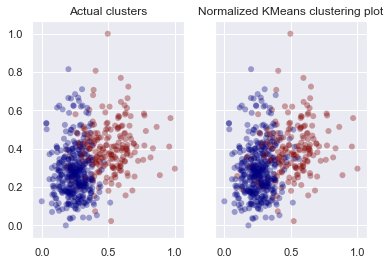

In [71]:
dfDataNor = normalized_df.drop("id",axis=1)
X = dfDataNor.drop('diagnosis', axis=1).values
km_norm = KMeans(n_clusters=2, init="k-means++", n_init=10)
km_pred_norm = km.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=normalized_df["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=km_pred_norm, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("Normalized KMeans clustering plot")

In [72]:
accurcy_Normalized = normalized_df.diagnosis == km_pred_norm
countNor = 0
for item in accurcy_Normalized:
    if item == True:
        countNor = countNor + 1
print("Accurucy of clustering of  normalized data % " +str(100*countNor/569))      

Accurucy of clustering of  normalized data % 92.79437609841828


### Classification

In [67]:
#required libraries imported for ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

I used K-Neighbors Nearest algorhitm for classification
I split the data as train and test
I tried to reach the most efficient result by increasing or decreasing test_size and neighbor values and chose these values
And I get the result

In [68]:
X = np.array(df.iloc[:, 1:]) 
y = np.array(df['diagnosis'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20, random_state = 42) 

In [69]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
KNN_prediction = knn.predict(X_test)

### Evaluation
I printed the percentage of success of my model and then vizualized the confusion matrix with the help of heatmap.
While the model I extracted was working with a success rate of 98 percent, it found 2 false positive value and never found false negative value in 114 test data in total.

Accuracy of model % 98.24561403508771


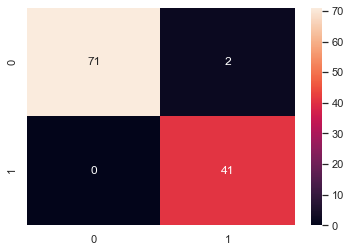

In [51]:
print("Accuracy of model % "  + str(100*accuracy_score(KNN_prediction, y_test)))
sns.heatmap(confusion_matrix(KNN_prediction, y_test), annot=True)
